## Importing Libraries

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
import tensorflow as tf
from sklearn import metrics
from sklearn import tree
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

## Reading / Importing  DataSet

In [ ]:
import pandas as pd
data = pd.read_csv('16P.csv', encoding='cp1252')

data.info() 

In [41]:
data = data.groupby('Personality', group_keys=False).apply(lambda x: x.sample(375))

In [ ]:
data.info()

## Pre-processing

In [78]:
data.shape

(59999, 62)

In [79]:
data.dtypes

Response Id                                                                                    int64
You regularly make new friends.                                                                int64
You spend a lot of your free time exploring various random topics that pique your interest     int64
Seeing other people cry can easily make you feel like you want to cry too                      int64
You often make a backup plan for a backup plan.                                                int64
                                                                                               ...  
You are very intrigued by things labeled as controversial.                                     int64
You would pass along a good opportunity if you thought someone else needed it more.            int64
You struggle with deadlines.                                                                   int64
You feel confident that things will work out for you.                                      

In [80]:
data.describe()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You would love a job that requires you to work alone most of the time.,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.
count,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000
mean,29999.000000,-0.000867,-0.000467,0.000267,-0.232887,-0.175653,0.005317,-0.476558,-0.000550,0.126819,...,0.001233,0.000133,0.115869,-0.002167,0.240687,-0.000533,0.000667,0.125152,0.001983,0.118202
std,17320.363738,0.365701,0.364652,1.527343,1.502173,1.502999,1.521413,1.445931,0.367361,1.537329,...,0.365517,0.367611,1.526440,0.366515,1.498320,0.364606,0.368426,1.515761,1.524584,1.542457
min,0.000000,-2.000000,-1.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-1.000000,-3.000000,...,-1.000000,-1.000000,-3.000000,-1.000000,-3.000000,-1.000000,-2.000000,-3.000000,-3.000000,-3.000000
25%,14999.500000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,0.000000,-1.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
50%,29999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44998.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,59998.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000


In [81]:
data.Personality.unique()

array(['ENFP', 'ISFP', 'INFJ', 'ISTP', 'ENFJ', 'INTJ', 'ENTJ', 'ESFP',
       'INFP', 'INTP', 'ISTJ', 'ENTP', 'ISFJ', 'ESTJ', 'ESTP', 'ESFJ'],
      dtype=object)

Inorder to not have a lot of classes to classify for, we have found that the calasses can be categorixed into 4 main personalities to diffrenciate.

In [82]:
label = data.groupby(['Personality'])['Personality'].count()
labels = pd.DataFrame(label)
labels.rename(columns= {'Personality':'Count'},inplace=True)
labels

,Count
Personality,
ENFJ,3743
ENFP,3760
ENTJ,3737
ENTP,3760
ESFJ,3746
ESFP,3769
ESTJ,3759
ESTP,3749
INFJ,3761


Text(0.5, 1.0, 'Total posts for each personality type')

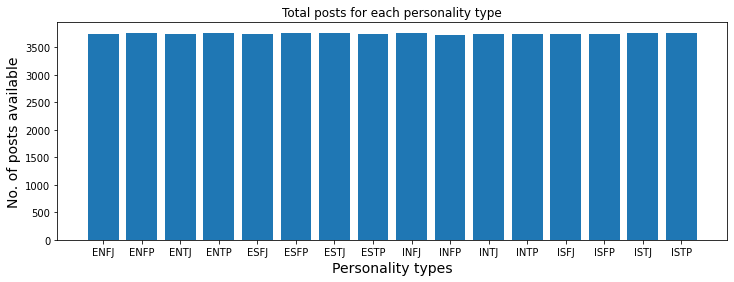

In [83]:
plt.figure(figsize = (12,4))
plt.bar(np.array(labels.index), height = labels['Count'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')

In [84]:
data.Personality.replace(['INTJ', 'INTP','ENTJ','ENTP'],'Analyst', inplace = True)
data.Personality.replace(['INFJ', 'INFP','ENFJ','ENFP'],'Diplomats', inplace = True) 
data.Personality.replace(['ISTJ', 'ISFJ','ESTJ','ESFJ'],'Sentinels', inplace = True)
data.Personality.replace(['ISTP', 'ISFP','ESTP','ESFP'],'Explorers', inplace = True)

In [85]:
label = data.groupby(['Personality'])['Personality'].count()
labels = pd.DataFrame(label)
labels.rename(columns= {'Personality':'Count'},inplace=True)
labels

,Count
Personality,
Analyst,14982
Diplomats,14998
Explorers,15019
Sentinels,15000


Text(0.5, 1.0, 'Total posts for each personality type')

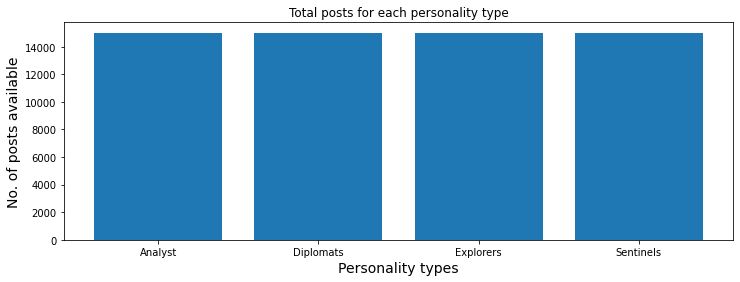

In [86]:
plt.figure(figsize = (12,4))
plt.bar(np.array(labels.index), height = labels['Count'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')

## Checking Missing Values and Dropping Duplicates

In [87]:
data.isnull().any()

Response Id                                                                                   False
You regularly make new friends.                                                               False
You spend a lot of your free time exploring various random topics that pique your interest    False
Seeing other people cry can easily make you feel like you want to cry too                     False
You often make a backup plan for a backup plan.                                               False
                                                                                              ...  
You are very intrigued by things labeled as controversial.                                    False
You would pass along a good opportunity if you thought someone else needed it more.           False
You struggle with deadlines.                                                                  False
You feel confident that things will work out for you.                                         False


In [88]:
print("Number of Duplicates: ")
print(data.duplicated().sum())
print("Number of Duplicates after dropping: ")
data.drop_duplicates(inplace = True)
print(data.duplicated().sum())

Number of Duplicates: 
0
Number of Duplicates after dropping: 
0


## Adding visuals

In [89]:
from wordcloud import WordCloud, STOPWORDS

In [90]:
colum = data[data['Personality'] == 'Analyst'].sum(axis = 0).drop(['Personality','Response Id'])
print("Number of Queries: ",len(colum))
print("Number of total positives for Analysts: ", colum[colum >= 0].count())
colum[colum == 0]


Number of Queries:  60
Number of total positives for Analysts:  25


Series([], dtype: object)

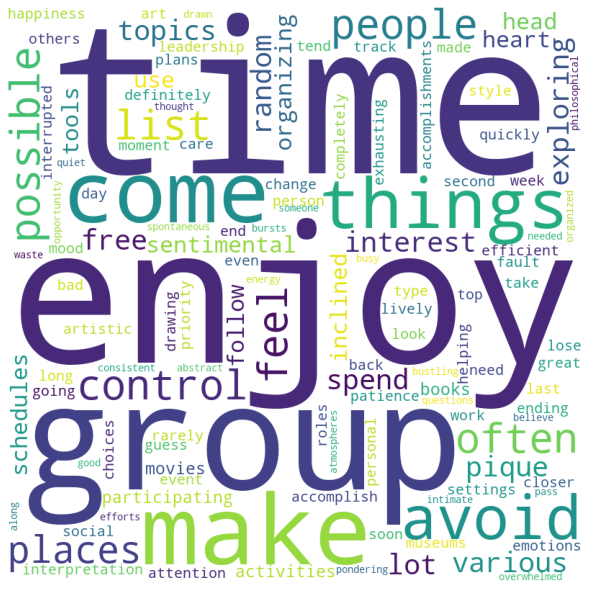

In [91]:
comment_words = ''
stopwords = set(STOPWORDS)
sentences = colum[colum >= 0].index.to_list()
# iterate through the csv file
for val in sentences:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [92]:
colum = data[data['Personality'] == 'Diplomats'].sum(axis = 0).drop(['Personality','Response Id'])
print("Number of Queries: ",len(colum))
print("Number of total positives for Diplomats: ", colum[colum >= 0].count())
colum[colum == 0]

Number of Queries:  60
Number of total positives for Diplomats:  34


You avoid leadership roles in group settings.    0
dtype: object

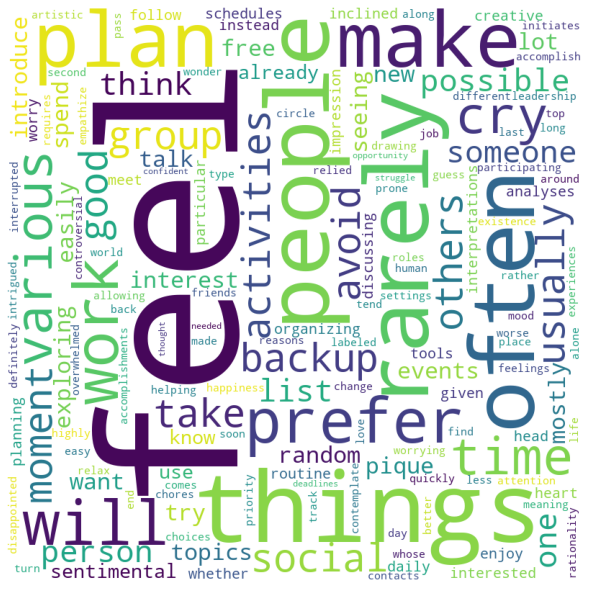

In [93]:
comment_words = ''
stopwords = set(STOPWORDS)
sentences = colum[colum >= 0].index.to_list()
# iterate through the csv file
for val in sentences:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [94]:
colum = data[data['Personality'] == 'Sentinels'].sum(axis = 0).drop(['Personality','Response Id'])
print("Number of Queries: ",len(colum))
print("Number of total positives for Sentinels: ", colum[colum >= 0].count())
colum[colum == 0]

Number of Queries:  60
Number of total positives for Sentinels:  25


Series([], dtype: object)

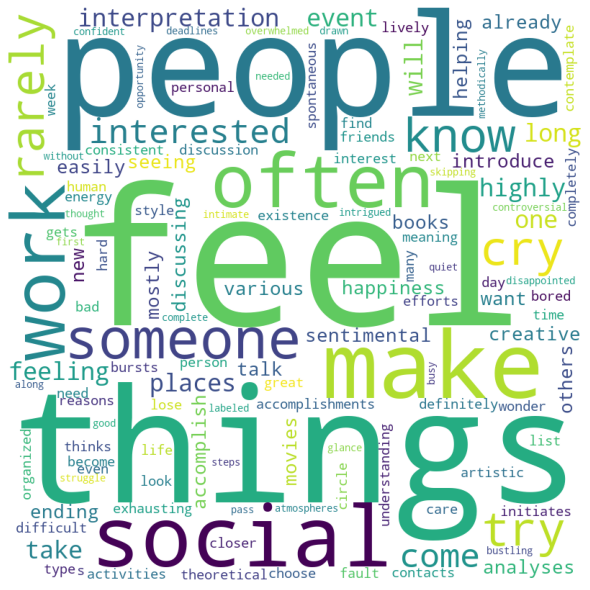

In [95]:
comment_words = ''
stopwords = set(STOPWORDS)
sentences = colum[colum >= 0].index.to_list()
# iterate through the csv file
for val in sentences:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [96]:
colum = data[data['Personality'] == 'Explorers'].sum(axis = 0).drop(['Personality','Response Id'])
print("Number of Queries: ",len(colum))
print("Number of total positives for Explorers: ", colum[colum >= 0].count())
colum[colum == 0]

Number of Queries:  60
Number of total positives for Explorers:  26


Series([], dtype: object)

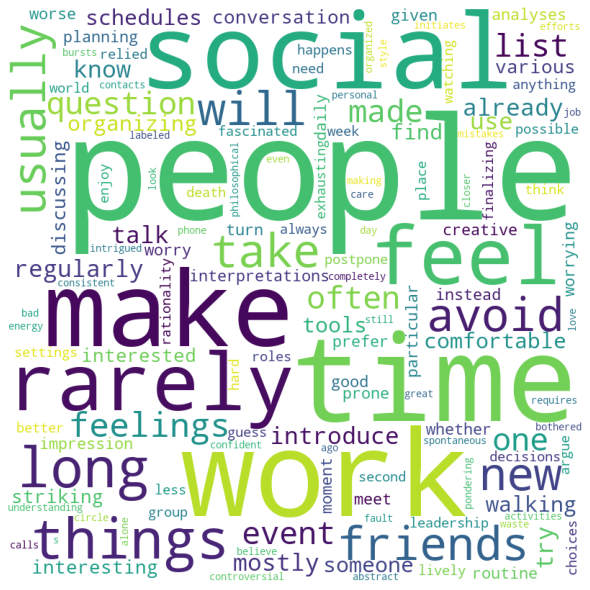

In [97]:
comment_words = ''
stopwords = set(STOPWORDS)
sentences = colum[colum >= 0].index.to_list()
# iterate through the csv file
for val in sentences:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Classification Models

In [198]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
def calculations_for_RF(X_train, X_test, y_train, y_test):
  rf_model=RandomForestClassifier()
  rf_model = RandomForestClassifier(bootstrap=True, max_depth=40, min_samples_split=8, n_estimators=100)
  start = time.time()    
  Model = rf_model.fit(X_train, y_train)
  stop = time.time()    
  y_pred = rf_model.predict(X_test)

  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F-Measure: ", f1_score(y_test, y_pred, average='weighted'))
  print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
  print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
  print(f"Training time: {stop - start}s")

In [176]:
#Gini Original
def calculations_for_gini_original(X_train, X_test, y_train, y_test):
  model = tree.DecisionTreeClassifier(criterion="gini")
  start = time.time()
  model = model.fit(X_train,y_train)
  stop = time.time()
  y_pred = model.predict(X_test)

  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F-Measure: ", f1_score(y_test, y_pred, average='weighted'))
  print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
  print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
  print(f"Training time: {stop - start}s")

In [177]:
#entropy Original
def calculations_for_entropy_original(X_train, X_test, y_train, y_test):
  model = tree.DecisionTreeClassifier(criterion = "entropy")
  start = time.time()
  model = model.fit(X_train,y_train)
  stop = time.time()
  y_pred = model.predict(X_test)

  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F-Measure: ", f1_score(y_test, y_pred, average='micro'))
  print("Precision: ", precision_score(y_test, y_pred, average='micro'))
  print("Recall: ", recall_score(y_test, y_pred, average='micro'))
  print(f"Training time: {stop - start}s")

In [178]:
#Gini Max Depth
def calculations_for_gini_maxdepth(X_train, X_test, y_train, y_test):
  model = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)
  start = time.time()
  model = model.fit(X_train,y_train)
  stop = time.time()
  y_pred = model.predict(X_test)

  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F-Measure: ", f1_score(y_test, y_pred, average='micro'))
  print("Precision: ", precision_score(y_test, y_pred, average='micro'))
  print("Recall: ", recall_score(y_test, y_pred, average='micro'))
  print(f"Training time: {stop - start}s")

In [179]:
#Gini Max Records
def calculations_for_gini_max_rec(X_train, X_test, y_train, y_test):
  model = tree.DecisionTreeClassifier(criterion="gini",max_leaf_nodes=40)
  start = time.time()
  model = model.fit(X_train,y_train)
  stop = time.time()
  y_pred = model.predict(X_test)

  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F-Measure: ", f1_score(y_test, y_pred, average='weighted'))
  print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
  print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
  print(f"Training time: {stop - start}s")

In [196]:
#XGBoost
def calculations_for_GBoost(X_train, X_test, y_train, y_test):
  XGB_model = GradientBoostingClassifier(max_depth=40, min_samples_split=8, n_estimators=100)
  start = time.time()  
  Model = XGB_model.fit(X_train, y_train)
  stop = time.time()           
  y_pred = XGB_model.predict(X_test)

  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F-Measure: ", f1_score(y_test, y_pred, average='micro'))
  print("Precision: ", precision_score(y_test, y_pred, average='micro'))
  print("Recall: ", recall_score(y_test, y_pred, average='micro'))
  print(f"Training time: {stop - start}s")

In [181]:
from xgboost import XGBClassifier
def calculations_for_XGBoost(X_train, X_test, y_train, y_test):
  model = XGBClassifier(subsample = 0.7, max_depth = 40)
  start = time.time() 
  model.fit (X_train, y_train)
  stop = time.time() 
  y_pred = model.predict (X_test)


  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F-Measure: ", f1_score(y_test, y_pred, average='micro'))
  print("Precision: ", precision_score(y_test, y_pred, average='micro'))
  print("Recall: ", recall_score(y_test, y_pred, average='micro'))
  print(f"Training time: {stop - start}s")

In [182]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

def calculations_for_LR(X_train, X_test, y_train, y_test):
  LR_model = LogisticRegression()
  start = time.time() 
  Model = LR_model.fit(X_train, y_train)
  stop = time.time() 
  y_pred = LR_model.predict(X_test)

  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F-Measure: ", f1_score(y_test, y_pred, average='weighted'))
  print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
  print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
  print(f"Training time: {stop - start}s")

In [184]:
from sklearn.linear_model import SGDClassifier
#SVM CLASSIFICATION MODEL FOR LARGE DATASET
def calculations_for_SVM1(X_train, X_test, y_train, y_test):
  SVM_model = SGDClassifier()
  start = time.time() 
  Model = SVM_model.fit(X_train, y_train)
  stop = time.time()         
  y_pred = SVM_model.predict(X_test)

  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F-Measure: ", f1_score(y_test, y_pred, average='micro'))
  print("Precision: ", precision_score(y_test, y_pred, average='micro'))
  print("Recall: ", recall_score(y_test, y_pred, average='micro'))
  print(f"Training time: {stop - start}s")

In [185]:
from sklearn.naive_bayes import GaussianNB
def calculations_for_naive_bayes(X_train, X_test, y_train, y_test):
  gnb = GaussianNB()
  start = time.time()
  model = gnb.fit(X_train, y_train)
  stop = time.time() 
  y_pred = gnb.predict(X_test)

  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])

  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  print("F-Measure: ", metrics.f1_score(y_test, y_pred, average='micro'))
  print("Precision: ", metrics.precision_score(y_test, y_pred, average='micro'))
  print("Recall: ", metrics.recall_score(y_test, y_pred, average='micro'))
  print(f"Training time: {stop - start}s")

In [186]:
#KNN 5
def calculations_for_knn5(X_train, X_test, y_train, y_test):
  knn = KNeighborsClassifier(n_neighbors=5)
  start = time.time()
  knn=knn.fit(X_train, y_train)
  stop = time.time()
  y_pred=knn.predict(X_test)

  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F-Measure: ", f1_score(y_test, y_pred, average='weighted'))
  print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
  print("Recall: ", recall_score(y_test, y_pred, average='weighted'))  

In [187]:
#KNN 3
def calculations_for_knn3(X_train, X_test, y_train, y_test):
  knn = KNeighborsClassifier(n_neighbors=3)
  start = time.time()
  knn=knn.fit(X_train, y_train)
  stop = time.time()
  y_pred=knn.predict(X_test)

  CM = confusion_matrix(y_test, y_pred)
  print(CM)
  print("TP :",CM[0][0])
  print("FP :",CM[0][1])
  print("FN :",CM[1][0])
  print("TN :",CM[1][1])
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F-Measure: ", f1_score(y_test, y_pred, average='micro'))
  print("Precision: ", precision_score(y_test, y_pred, average='micro'))
  print("Recall: ", recall_score(y_test, y_pred, average='micro'))  

## Classifying the Data

In [189]:
y_for_all_data = data['Personality']
train_for_all_data = data.copy().drop('Personality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_for_all_data, y_for_all_data, test_size=0.3, shuffle=True)

In [197]:
print("********* calculations_for_gini_original ********* ")
calculations_for_gini_original(X_train, X_test, y_train, y_test)

print("\n********* calculations_for_entropy_original ********* ")
calculations_for_entropy_original(X_train, X_test, y_train, y_test)

print("\n********* calculations_for_gini_maxdepth ********* ")
calculations_for_gini_maxdepth(X_train, X_test, y_train, y_test)

print("\n********* calculations_for_gini_max_rec ********* ")
calculations_for_gini_max_rec(X_train, X_test, y_train, y_test)

print("\n********* calculations_for_XGBoost ********* ")
calculations_for_GBoost(X_train, X_test, y_train, y_test)

print("\n********* calculations_for_XGBoost2 ********* ")
calculations_for_XGBoost(X_train, X_test, y_train, y_test)

print("\n********* calculations_for_SVM ********* ")
calculations_for_SVM1(X_train, X_test, y_train, y_test)

print("\n********* calculations_for_LR ********* ")
calculations_for_LR(X_train, X_test, y_train, y_test)

print("\n********* calculations_for_RandomForest ********* ")
calculations_for_RF(X_train, X_test, y_train, y_test)

print("\n********* calculations_for_naive_bayes ********* ")
calculations_for_naive_bayes(X_train, X_test, y_train, y_test)

print("\n********* calculations_for_knn5 ********* ")
calculations_for_knn5(X_train, X_test, y_train, y_test)

print("\n********* calculations_for_knn3 ********* ")
calculations_for_knn3(X_train, X_test, y_train, y_test)

********* calculations_for_gini_original ********* 
[[4261  552  525  644]
 [ 604 4265  602  602]
 [ 514  599 4247  584]
 [ 630  597  596 4178]]
TP : 4261
FP : 552
FN : 604
TN : 4265
Accuracy:  0.7062916666666667
F-Measure:  0.7062916666666667
Precision:  0.7062916666666667
Recall:  0.7062916666666667
Training time: 0.9038078784942627s

********* calculations_for_entropy_original ********* 
[[4375  556  431  620]
 [ 617 4280  605  571]
 [ 503  662 4208  571]
 [ 649  588  543 4221]]
TP : 4375
FP : 556
FN : 617
TN : 4280
Accuracy:  0.7118333333333333
F-Measure:  0.7118333333333333
Precision:  0.7118333333333333
Recall:  0.7118333333333333
Training time: 1.4982926845550537s

********* calculations_for_gini_maxdepth ********* 
[[4403  528  483  568]
 [ 622 4212  627  612]
 [ 598  670 4129  547]
 [ 732  590  601 4078]]
TP : 4403
FP : 528
FN : 622
TN : 4212
Accuracy:  0.7009166666666666
F-Measure:  0.7009166666666666
Precision:  0.7009166666666666
Recall:  0.7009166666666666
Training time: 0